In [1]:
import os, os.path
import numpy as np
from time import time
import pandas as pd
import math as m
import setup_runs as sr
import importlib
import matplotlib.pyplot as plt
import itertools

In [2]:
df_attribute_master_id = pd.read_csv(sr.fp_csv_attribute_master)
#temp overwrite
df_master_exp = df_attribute_master_id[(df_attribute_master_id["design_id"] == 0)]
#set gams vals
df_master_exp_gams = df_master_exp[df_master_exp["strategy_id"] > 0]
df_master_exp_gams[["master_id"]].to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams, index = None, encoding = "UTF-8")


In [4]:
cols = list(df_ed.columns)
cols.sort()
cols

['cement_frac_biomass',
 'cement_frac_coal',
 'cement_frac_diesel',
 'cement_frac_electric',
 'cement_frac_hydrogen',
 'cement_frac_kerosene',
 'cement_frac_natural_gas',
 'cement_frac_thermal_solar',
 'cement_intensity',
 'cement_production',
 'commercial_acs_diesel',
 'commercial_acs_natural_gas',
 'commercial_acs_pliqgas',
 'commercial_dem_acs',
 'commercial_dem_heating',
 'commercial_dem_motive',
 'commercial_dem_other',
 'commercial_elasticity',
 'commercial_frac_biomass',
 'commercial_frac_diesel',
 'commercial_frac_electric',
 'commercial_frac_kerosene',
 'commercial_frac_natural_gas',
 'commercial_frac_pliqgas',
 'commercial_fuel_price_diesel',
 'commercial_fuel_price_hydrogen',
 'commercial_fuel_price_natural_gas',
 'commercial_fuel_price_pliqgas',
 'commercial_heating_diesel',
 'commercial_heating_electric',
 'commercial_heating_natural_gas',
 'commercial_heating_pliqgas',
 'commercial_other_biomass',
 'commercial_other_diesel',
 'commercial_other_electric',
 'commercial_othe

In [2]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)

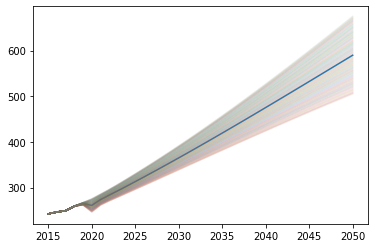

In [27]:
df_ed2 = df_ed[(df_ed["strategy_id"] == 0) & (df_ed["time_series_id"] == 1)].sort_values(by = ["future_id", "year"])
#df_ed2 = df_ed2[df_ed2["year"].isin([2049, 2050])]
field = "pib"#"transport_pkm_aviation"

for fut in df_ed2["future_id"].unique():
    x = np.array(df_ed2[df_ed2["future_id"] == fut]["year"])
    y = np.array(df_ed2[df_ed2["future_id"] == fut][field])
    
    if fut == 0:
        a = 1
    else:
        a = 0.05
    plt.plot(x, y, alpha = a)
    
plt.show()
    

In [9]:
list(df_ed.columns)

['master_id',
 'design_id',
 'future_id',
 'run_id',
 'strategy_id',
 'time_series_id',
 'year',
 'cement_frac_biomass',
 'cement_frac_coal',
 'cement_frac_diesel',
 'cement_frac_electric',
 'cement_frac_hydrogen',
 'cement_frac_kerosene',
 'cement_frac_natural_gas',
 'cement_frac_thermal_solar',
 'cement_intensity',
 'cement_production',
 'commercial_acs_diesel',
 'commercial_acs_natural_gas',
 'commercial_acs_pliqgas',
 'commercial_dem_acs',
 'commercial_dem_heating',
 'commercial_dem_motive',
 'commercial_dem_other',
 'commercial_elasticity',
 'commercial_frac_biomass',
 'commercial_frac_diesel',
 'commercial_frac_electric',
 'commercial_frac_kerosene',
 'commercial_frac_natural_gas',
 'commercial_frac_pliqgas',
 'commercial_fuel_price_diesel',
 'commercial_fuel_price_hydrogen',
 'commercial_fuel_price_natural_gas',
 'commercial_fuel_price_pliqgas',
 'commercial_heating_diesel',
 'commercial_heating_electric',
 'commercial_heating_natural_gas',
 'commercial_heating_pliqgas',
 'comme

In [130]:
if False:
    results = pd.read_csv(sr.fp_csv_output_multi_sector)
    #get total demand
    results["all-electricity_total_demand-gwh"] = results[[x for x in results.columns if ("electricity_total_demand" in x)]].sum(axis = 1)
    #reduce to total demand
    df_demand = results[["master_id", "year", "all-electricity_total_demand-gwh"]].copy().rename(columns = {"all-electricity_total_demand-gwh": "Total", "year": "Year"})
else:
    df_demand = pd.read_csv("/Volumes/[C] syme-j-PVM.hidden/Users/jsyme/Desktop/MultiSector_LTS_Chile-master_20201030/MultiSector_LTS_Chile-master_20201030/MultiSector_LTS_Chile-master/out/electric_demand_sectors.csv")
    df_demand["Total"] = df_demand[[x for x in df_demand.columns if (x not in ["master_id", "year"])]].sum(axis = 1)
    df_demand = df_demand.rename(columns = {"year": "Year"})


In [136]:
#get total demand
results["all-electricity_total_demand-gwh"] = results[[x for x in results.columns if ("electricity_total_demand" in x)]].sum(axis = 1)
#reduce to total demand
df_demand = results[["master_id", "year", "all-electricity_total_demand-gwh"]].copy().rename(columns = {"all-electricity_total_demand-gwh": "Total", "year": "Year"})

if False:
    # Se leen los archivos CSV y se guardan como dataframes
    df_duration = pd.read_csv(sr.fp_csv_gams_data_duration)
    df_distr_bloq = pd.read_csv(sr.fp_csv_gams_distribution_by_bloq)
    df_distr_bus = pd.read_csv(sr.fp_csv_gams_shared_by_bus)
else:
    df_duration = pd.read_csv(os.path.join(dir_gm, os.path.basename(sr.fp_csv_gams_data_duration)))
    df_distr_bloq = pd.read_csv(os.path.join(dir_gm, os.path.basename(sr.fp_csv_gams_distribution_by_bloq)))
    df_distr_bus = pd.read_csv(os.path.join(dir_gm, os.path.basename(sr.fp_csv_gams_shared_by_bus)))
#clean
df_distr_bus = df_distr_bus.rename(columns = {"Agno": "Year"})
#get
all_master = list(df_demand['master_id'].unique())
all_master.sort()
# Se define como parametro la cantidad de annos
years = len(df_demand["Year"].unique())
# Se extraen los nombres de las barras
bus_1 = df_distr_bus.iloc[0][0]
bus_2 = df_distr_bus.iloc[1][0]
# Se filtra el dataframe que contiene los porcentajes de distribucion de la demanda entre las barras en un dataframe por barra
df_distr_bus_1 = df_distr_bus[df_distr_bus['Bus'] == bus_1].reset_index(drop = True)
df_distr_bus_2 = df_distr_bus[df_distr_bus['Bus'] == bus_2].reset_index(drop = True)

#build master id
df_master_id = df_demand[['master_id', 'Year']].copy()

##  BUILD DEMAND BY BUS
fields_index = ["master_id", "Year"]
df_demand_by_bus = df_distr_bus.copy()
#merge in total demand
df_demand_by_bus = pd.merge(df_demand, df_demand_by_bus, how = "outer", on = ["Year"])
# Se multiplican las columnas de la demanda total con la columna del dataframe con los porcentajes por barras y se colocan en la columna del dataframme
df_demand_by_bus["valor"] = np.array(df_demand_by_bus["Shared_by_bus"])*np.array(df_demand_by_bus["Total"])
#set to wide format
df_demand_by_bus = df_demand_by_bus[fields_index + ["Bus", "valor"]]
#df_demand_by_bus = sr.data_to_wide(df_demand_by_bus, "Bus", "valor", fields_index, False) 
df_demand_by_bus = df_demand_by_bus.sort_values(by = fields_index)

#get duration by block
df_duration = df_duration.rename(columns = {'Agno': 'Year'})
df_distr_bloq = df_distr_bloq.merge(df_duration, on = ['Year', 'Etapa', 'Bloque'], how = 'left')

#get all demand data merged
df_data_demanda = pd.merge(df_demand_by_bus, df_distr_bloq, how = "outer", on = ["Year", "Bus"]).rename(columns = {"valor": "Demanda_Barra_Agno"})

# Se obtienen las columnas que son la multiplicacion de otras columnas
df_data_demanda['Potencia_Bloque'] = 1000*np.array(df_data_demanda['Distribucion_Bloque']) * np.array(df_data_demanda['Distribucion_Etapa']) * np.array(df_data_demanda['Demanda_Barra_Agno'])/np.array(df_data_demanda['Duracion'])
df_out = df_data_demanda[['master_id', 'Bus','Year', 'Etapa', 'Bloque', 'Potencia_Bloque']] 
df_out = df_out.rename(columns = {'master_id':'Escenario', 'Bus':'Barra', 'Year':'Agno', 'Potencia_Bloque':'Demanda'})
#export
df_out.to_csv(sr.fp_csv_gams_data_demanda_electrica_escenarios, index = False, encoding = "UTF-8")



In [170]:
df_esc = pd.read_csv(os.path.join(sr.dir_gams_input, "data_set_escenarios.csv"))





In [179]:
ld = os.listdir(sr.dir_gams_input)
ld = [x for x in ld if ".csv" in x]
dict_check = {}

for x in ld:
    df_tmp = pd.read_csv(os.path.join(sr.dir_gams_input, x))
    cols_check = [k for k in df_tmp.columns if ("Escenario" in k)]
    
    if len(cols_check) > 0:
        dict_check.update({x: df_tmp})

In [180]:
dict_check.keys()

dict_keys(['data_precio_energeticos_escenarios.csv', 'data_set_escenario_sel.csv', 'data_demanda_electrica_escenarios.csv', 'data_demanda_electrica_escenarios_base.csv', 'data_set_escenarios.csv', 'data_costo_inversion_procesos_escenarios.csv'])

In [191]:
dt = dict_check["data_precio_energeticos_escenarios.csv"]
dt_wide = sr.data_to_wide(dt, "Escenario", "Precio", ["Agno", "Energeticos"], False)
dt_wide[dt_wide["Agno"] == 2050]

,Agno,Energeticos,0,1,2,3,4,5,6,7,...,34,35,36,37,38,39,40,41,42,43
35,2050,carbon_generacion,70.792786,75.409616,66.594132,61.006074,59.633327,57.410356,70.875558,75.870811,...,63.024871,63.889010,71.957743,69.166541,64.009299,72.923214,56.966988,67.974546,55.947994,68.764009
71,2050,gas_natural_generacion,8.676578,10.072485,8.956924,9.439149,9.186438,10.203122,11.809680,9.313034,...,10.669214,8.927483,11.380875,10.288803,11.790642,9.161901,10.751672,8.499649,11.831310,10.725380
107,2050,diesel_generacion,659.654418,583.365932,616.533779,665.842714,587.820810,706.135072,673.923032,703.790937,...,680.082198,609.457029,718.282770,839.145391,654.493493,795.870967,902.584242,845.626587,794.209392,924.874595
143,2050,fuel_oil,543.146109,416.951541,544.820013,569.910084,577.565025,580.456776,538.053659,717.797600,...,571.016912,650.581333,563.353293,657.263617,421.373171,525.503011,433.409429,594.567519,626.615371,519.615761


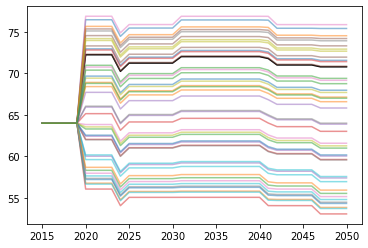

In [205]:
carb = dt_wide[dt_wide["Energeticos"] == "carbon_generacion"]
x = np.array(carb["Agno"])

y = np.array(carb[0])
plt.plot(x, y, alpha = 1, color = "black")
for val in range(1, 44):
    y = np.array(carb[val])
    plt.plot(x, y, alpha = 0.5)
plt.show()
    
    


In [2]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)
df_ed_sv = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)

In [256]:
df_mt = pd.read_csv(sr.fp_csv_parameter_mix_trajectories)
#df_mt["mix_parameter"] = [(x[0] + "_mix") for x in np.array(df_mt[["parameter", "time_serie"]])]
df_params_out = df_mt[["parameter"]].drop_duplicates()
df_params_out["parameter"] = ["trajmix_" + x for x in df_params_out["parameter"]] 
v = sr.build_linear_mix_vec((2019, 2050), (2015, 2050))
df_params_out = pd.concat([df_params_out.reset_index(drop = True), pd.DataFrame([v*0.5 for x in range(len(df_params_out))], columns = range(2015, 2051))], axis = 1)
df_params_out["strategy_id"] = [0 for x in range ]




In [221]:
price_coal = 'fuel_price_coal'
price_gas = 'fuel_price_natural_gas'
price_diesel = 'fuel_price_diesel'
price_oil = 'fuel_price_fuel_oil'

#df_ed[price_coal]

In [249]:
df_mt["mix_parameter"] = [("traj" + x[1] + "_"  + x[0]) for x in np.array(df_mt[["parameter", "traj_type"]])]

In [250]:
df_mt.to_csv("/Users/jsyme/Desktop/tmpmp.csv", index = None, encoding = "UTF-8")

In [258]:
df_params_out.to_csv("/Users/jsyme/Desktop/tmpmp2.csv", index = None, encoding = "UTF-8")

In [259]:
len("test")

4

In [7]:
len(df_ed["master_id"].unique())

44

In [263]:
df_cat_gas = pd.DataFrame(["test" for i in range(36)])

In [302]:
#set ids for different data frames
dict_dfs_exp = {
    "inversion": {"substr": "investment", "exp_path": sr.fp_csv_gams_data_costo_inversion_procesos_escenarios},
    "precio": {"substr": "fuel_price", "exp_path": sr.fp_csv_gams_data_precio_energeticos_escenarios}
}
#loop
for k in list(dict_dfs_exp.keys()):
    #get substring id
    substr_id = str(dict_dfs_exp[k]["substr"])
    #get sub data frame
    df_sub = df_ed[["master_id", "year"] + [x for x in df_ed.columns if (x in sr.dict_map_params_to_params_gams.keys()) and (x[0:min(len(x), len(substr_id))] == substr_id)]].copy()
    #rename
    df_sub = df_sub.rename(columns = sr.dict_map_params_to_params_gams)
    #conver to long and rename
    df_sub = pd.melt(df_sub, ["master_id", "year"]).rename(columns = {"master_id": "Escenario", "year": "Agno", "variable": "Energeticos", "value": "Precio"})
    #export
    df_sub.to_csv(dict_dfs_exp[k]["exp_path"], encoding = "UTF-8", index = None)
    

In [300]:
pd.melt(df_sub, ["master_id", "year"])

,master_id,year,variable,value
0,0,2015,generacion_solar_csp,7332.000000
1,0,2016,generacion_solar_csp,7332.000000
2,0,2017,generacion_solar_csp,7332.000000
3,0,2018,generacion_solar_csp,7332.000000
4,0,2019,generacion_solar_csp,7332.000000
...,...,...,...,...
2875,15,2046,generacion_eolica,1037.217581
2876,15,2047,generacion_eolica,1038.075469
2877,15,2048,generacion_eolica,1038.798673
2878,15,2049,generacion_eolica,1039.383947


In [272]:
df_map_param_to_pg = pd.read_csv(sr.fp_csv_map_parameter_to_gams)
sr.build_dict(df_map_param_to_pg[["parameter", "parameter_gams"]])


{'investment_cost_pv_solar': 'generacion_solar_fv',
 'investment_cost_csp_solar': 'generacion_solar_csp',
 'investment_cost_wind': 'generacion_eolica',
 'investment_cost_geothermal': 'generacion_geotermia',
 'investment_cost_natural_gas_cc': 'generacion_gas_natural_cc',
 'fuel_price_coal': 'carbon_generacion',
 'fuel_price_natural_gas': 'gas_natural_generacion',
 'fuel_price_diesel': 'diesel_generacion',
 'fuel_price_fuel oil': 'fuel_oil'}

In [305]:
pd.DataFrame([[1]], columns = ["Test"])

,Test
0,1


In [306]:
df_attribute_master = pd.read_csv(sr.fp_csv_attribute_master)
df_masters_to_run = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run)

In [307]:
df_masters_to_run

,master_id
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7


In [309]:
for m in df_masters_to_run["master_id"]:
    print(list(df_attribute_master["master_id"]).index(m))

0
1
2
3
4
5
6
7


In [313]:
sr.fp_gams_modelo

'/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/gams/pmr/modelo/modelo_energetico_PMR_20201009.gms'

In [317]:
print(time.time())
time.sleep(1)
print(time.time())

1605084214.550484
1605084215.556038


In [321]:
results

,master_id,year,co-electricity_total_demand-gwh,co-emissions_total-mtco2e,im-electricity_cement_demand-gwh,im-electricity_copper_demand-gwh,im-electricity_fishing_demand-gwh,im-electricity_iron_demand-gwh,im-electricity_other_industries_demand-gwh,im-electricity_other_mining_demand-gwh,...,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e,all-electricity_total_demand-gwh
0,0,2015,8541.714800,2.309573,1977.247066,24821.075846,156.444138,808.872992,11226.164916,1179.823429,...,416.897254,1.219239,3.288999,0.715503,12.861071,0.591592,26.004890,0.098185,7.230302,71280.371262
1,0,2016,8541.714800,2.309573,1977.247066,24821.075846,156.444138,808.872992,11226.164916,1179.823429,...,421.745181,1.369477,3.336306,0.633547,13.537586,0.598033,26.803220,0.097969,7.230302,71456.469490
2,0,2017,8541.714800,2.309573,1977.247066,24821.075846,156.444138,808.872992,11226.164916,1179.823429,...,457.443650,1.474356,3.371601,0.611322,13.594860,0.606331,26.979861,0.091088,7.230302,71712.696777
3,0,2018,9141.687480,2.471798,2042.861917,25312.768691,156.274456,811.384112,11037.738700,1201.525361,...,502.519510,1.561705,3.349866,0.661311,13.947916,0.631670,27.728720,0.092806,7.483447,73363.792524
4,0,2019,9460.444616,2.557986,2031.207062,26403.522262,156.115441,809.238362,11000.435221,1205.969798,...,686.972091,1.649551,3.229574,0.661174,14.250559,0.641634,28.139906,0.092806,7.614609,75414.978014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,7,2046,49016.330892,5.821199,1635.747787,55804.846780,160.275215,1283.979030,14644.609824,1592.098241,...,11761.227506,7.139901,0.000000,1.107201,17.303847,0.000000,32.973964,0.097717,7.325299,181210.521364
284,7,2047,51547.526395,5.911672,1636.235973,57328.069473,160.580883,1283.996585,14825.646993,1608.684228,...,12718.878245,7.480568,0.000000,1.130393,16.406027,0.000000,32.189571,0.097899,7.074684,187344.373031
285,7,2048,54202.373780,6.000056,1637.997101,58896.737657,160.890392,1284.014130,15010.311900,1625.460201,...,13756.966396,7.832867,0.000000,1.156184,15.386785,0.000000,31.292688,0.098081,6.818772,193884.643269
286,7,2049,56890.119494,6.075730,1637.919756,60510.110841,161.202785,1284.031687,15194.726920,1642.424222,...,14903.039065,8.195161,0.000000,1.179013,14.192654,0.000000,30.217370,0.098262,6.552279,200946.543305


In [365]:
##  BUILD ATTRIBUTE FILE

def set_def(x):
    if dict_field_type[x] == "filter":
        return "all"
    else:
        return ""

#initialize
df_attribute_field = [[x, x.replace("_", " "), dict_field_type[x], set_def(x), 1] for x in dict_field_type.keys()]
#dataframe
df_attribute_field = pd.DataFrame(df_attribute_field, columns = ["field_name", "field_display_name", "field_prim_type", "field_filter_default", "include"])
#convert to integer
df_attribute_field["include"] = np.array(df_attribute_field["include"]).astype(int)




In [367]:
df_prim

,master_id,strategy_id,cement_production,copper_production,cumplimiento_metas,especies_exoticas,especies_nativas,fishing_production,incendio_bosque_nativo,incendio_plantaciones_forestales,...,co-emissions_total-mtco2e,im-emissions_total-mtco2e,pu-emissions_total-mtco2e,re-emissions_total-mtco2e,tx-emissions_total-mtco2e,ag-emissions_total-mtco2e,fo-emissions_total-mtco2e,ip-emissions_total-mtco2e,wa-emissions_total-mtco2e,el-emissions_total-mtco2e
0,0,0,4956.645407,9940.922610,1.000000,6.604015e+06,6.593289e+06,4752.855000,0.0,0.0,...,5.553363,16.170396,0.164441,6.174163,27.798260,10.338088,-61.902828,7.134724,6.738647,2.61
1,1,0,4993.648726,9613.373913,1.027678,7.703721e+06,6.387344e+06,4816.662561,0.0,0.0,...,5.409909,15.898822,0.170353,5.696323,27.704408,10.555351,-59.769188,7.071612,6.714912,2.61
2,2,0,5403.867789,10847.452439,0.842706,5.955067e+06,7.551210e+06,4338.248958,0.0,0.0,...,6.377982,17.054607,0.184280,6.505910,29.816858,10.504467,-63.161910,7.485956,6.877601,2.61
3,3,0,4804.843522,11359.058415,0.852505,5.527154e+06,7.698712e+06,5211.004529,0.0,0.0,...,5.622857,17.409881,0.190467,6.921748,28.032009,10.645824,-63.992144,7.166504,6.749798,NaN
4,4,0,4523.034995,9074.915751,0.996000,7.301031e+06,6.918554e+06,4497.983814,0.0,0.0,...,7.257230,16.218920,0.172748,6.117600,33.590997,10.020470,-60.550484,7.839050,7.015145,NaN
5,5,0,5124.266429,9995.115104,1.017580,5.719108e+06,6.071895e+06,4418.797331,0.0,0.0,...,4.044501,16.026223,0.146274,5.410616,23.340438,10.043008,-63.619717,6.422645,6.435411,NaN
6,6,0,5305.923473,12774.725268,0.882658,6.462246e+06,5.972190e+06,4990.283520,0.0,0.0,...,4.360430,16.931335,0.146231,6.198622,24.665460,10.069487,-62.177887,6.573713,6.509140,NaN
7,7,0,4950.929925,8259.992745,0.912552,7.586024e+06,6.625010e+06,4645.894755,0.0,0.0,...,7.043117,15.374084,0.123994,5.135186,32.005476,10.823919,-59.997542,7.754471,6.979826,NaN
8,8,0,4723.847144,13747.451868,0.808563,6.173330e+06,7.337703e+06,4737.932879,0.0,0.0,...,6.054908,18.382925,0.177158,6.774649,29.031154,10.500809,-62.738438,7.351971,6.827239,NaN
9,9,0,5157.478673,12607.519092,0.958794,6.934167e+06,5.548289e+06,5119.106035,0.0,0.0,...,4.567238,17.429757,0.194899,7.225055,24.163237,9.602113,-61.262270,6.678584,6.552192,NaN


In [2]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)

In [5]:
df_ed[df_ed["year"] == 2050]["var_demanda_legna"]

35      0.743467
71      0.418056
107     0.894612
143     0.807517
179     0.713338
215     0.492440
251     0.823598
287     0.563963
323     0.976398
359     0.685752
395     0.561043
431     0.743467
467     0.418056
503     0.894612
539     0.807517
575     0.713338
611     0.492440
647     0.823598
683     0.563963
719     0.976398
755     0.685752
791     0.561043
827     0.743467
863     0.418056
899     0.894612
935     0.807517
971     0.713338
1007    0.492440
1043    0.823598
1079    0.563963
1115    0.976398
1151    0.685752
1187    0.561043
1223    0.743467
1259    0.418056
1295    0.894612
1331    0.807517
1367    0.713338
1403    0.492440
1439    0.823598
1475    0.563963
1511    0.976398
1547    0.685752
1583    0.561043
Name: var_demanda_legna, dtype: float64

In [2]:
df_pmr = pd.read_csv(sr.fp_csv_output_multi_sector_pmr)

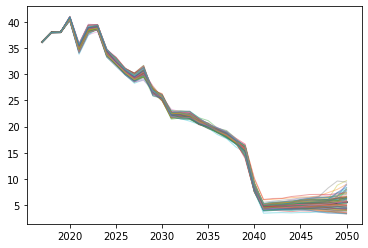

In [13]:
l = list(df_pmr[df_pmr["year"] == 2050]["el-emissions_total-mtco2e"])

ms = list(set(df_pmr["master_id"]))
ms.sort()

x = list(set(df_pmr["year"]))
x.sort()

m = 101
y = list(df_pmr[df_pmr["master_id"] == m]["el-emissions_total-mtco2e"])

plt.plot(x, y, color = "black", alpha = 1, linewidth = 2)

for m in [k for k in ms if x != 101]:
    y = list(df_pmr[df_pmr["master_id"] == m]["el-emissions_total-mtco2e"])
    plt.plot(x, y, alpha = 0.4, linewidth = 1)

plt.show()


In [11]:
y

[]

In [3]:
(0.76)**11

0.048859555885783564

AttributeError: module 'setup_runs' has no attribute 'fp_csv_mapping_year_to_cost_year'

In [2]:
export_ed_files_q = True
print("Starting build of components for experimental design.")


#number of lhs samples
n_lhs = sr.dict_init["n_lhs"]
#set baseline strategy
strat_baseline = 0#[x for x in sr.dict_strat.keys() if sr.dict_strat[x]["strategy_id"] == 0][0]

###   SOME ATTRIBUTE TABLES
df_attribute_design_id = pd.read_csv(sr.fp_csv_attribute_design)
#reduce
df_attribute_design_id = df_attribute_design_id[df_attribute_design_id["include"] == 1]
#get time series id
df_attribute_time_series_id = pd.read_csv(sr.fp_csv_attribute_time_series)


print("Check: export_ed_files_q = " + str(export_ed_files_q))
print("Check: n_lhs = " + str(n_lhs))




#################################
#    MULTI SECTOR COMPONENTS    #
#################################


###   GET THE PARAMETER TABLE

#read in uncertainty table for additional sectors
parameter_table_additional_sectors = pd.read_csv(sr.fp_csv_parameter_ranges)
#pd.read_csv(os.path.join(sr.dir_ref, "archive", "parameter_ranges_safe_20201216.csv"))#
#reduce
parameter_table_additional_sectors = parameter_table_additional_sectors[parameter_table_additional_sectors["type"].isin(["incertidumbre", "accion"])]
#add field
parameter_table_additional_sectors["variable_name_lower"] = [x.lower().replace(" ", "_") for x in list(parameter_table_additional_sectors["parameter"])]
#fill nas and set to integer
parameter_table_additional_sectors["parameter_constant_q"] = parameter_table_additional_sectors["parameter_constant_q"].fillna(0)
parameter_table_additional_sectors["parameter_constant_q"] = np.array(parameter_table_additional_sectors["parameter_constant_q"]).astype(int)
#initialize available groups
groups_norm = set([int(x) for x in parameter_table_additional_sectors["normalize_group"] if not np.isnan(x)])

# IDENTIFY PARAMETERS THAT DO NOT VARY
df_apn = parameter_table_additional_sectors[["variable_name_lower", "min_2050", "max_2050"]].copy().drop_duplicates().reset_index(drop = True)
#initialize the set
all_params_novary = set({})
#loop to build
for p in df_apn["variable_name_lower"].unique():
    df_apn_tmp = df_apn[df_apn["variable_name_lower"] == p]
    #check to see if it doesn't vary
    if len(df_apn_tmp) == 1:
        if float(df_apn_tmp["min_2050"].iloc[0]) == float(df_apn_tmp["max_2050"].iloc[0]):
            if float(df_apn_tmp["min_2050"].iloc[0]) == 1.0:
                all_params_novary = all_params_novary | set({p})

all_params_vary = set(parameter_table_additional_sectors["variable_name_lower"]) - all_params_novary



###   NORMALIZATION GROUP IDS

group_id = parameter_table_additional_sectors[["type", "parameter", "normalize_group"]].drop_duplicates()
#build normalize group and lever group ids (for deltas)
norm_vec = []

if len(groups_norm) > 0:
    #starting point for new group
    ind_group = max(groups_norm) + 1
else:
    ind_group = 1

#loop over rows
for i in range(0, len(group_id)):
    #get current group
    group_cur = group_id["normalize_group"].iloc[i]
    #test for NaN
    if np.isnan(group_cur):
        norm_vec = norm_vec + [ind_group]
        #next iteration
        ind_group += 1
    else:
        norm_vec = norm_vec + [int(group_cur)]

#add to group_id data frame
group_id["norm_group_id"] = norm_vec
group_id = group_id.reset_index(drop = True)


###   LEVER GROUP IDS

#temporary data frame to build lever group id with
group_id_tmp = group_id[["type", "norm_group_id"]].drop_duplicates()
group_id_tmp = group_id_tmp[group_id_tmp["type"].isin(["Accion", "accion"])]
group_id_tmp["lever_group_id"] = range(1, len(group_id_tmp) + 1)
if "lever_group_id" not in group_id.columns:
    group_id = pd.merge(group_id, group_id_tmp[["norm_group_id", "lever_group_id"]], how = "left", left_on = ["norm_group_id"], right_on = ["norm_group_id"])
#reduce
group_id = group_id[["parameter", "type", "norm_group_id", "lever_group_id"]]
#replace nas
group_id = group_id.fillna({"lever_group_id": -1})
#integer
group_id["lever_group_id"] = [int(x) for x in list(group_id["lever_group_id"])]
#merge in
group_id  = pd.merge(group_id, parameter_table_additional_sectors[["parameter", "variable_name_lower"]], how = "left", left_on = ["parameter"], right_on = ["parameter"])
group_id = group_id.drop_duplicates()
group_id = group_id[["parameter", "type", "variable_name_lower", "norm_group_id", "lever_group_id"]]


###   MERGE BACK IN TO PTAS AND CLEAN NAMES/DATA

#set merge fields and merge
fields_merge = list(set(parameter_table_additional_sectors.columns).intersection(set(group_id.columns)))
parameter_table_additional_sectors = pd.merge(parameter_table_additional_sectors, group_id, how = "left", left_on = fields_merge, right_on = fields_merge)
#fields to extract
fields_ext = [x for x in parameter_table_additional_sectors if (x not in ["normalize_group"])]
#clean the data frame
parameter_table_additional_sectors = parameter_table_additional_sectors[fields_ext]
parameter_table_additional_sectors = parameter_table_additional_sectors.dropna(axis = 1)
#dictionary to rename
dict_ptas_rename = dict([[x, x.lower().replace(" ", "_")] for x in parameter_table_additional_sectors.columns])
#set type
parameter_table_additional_sectors = parameter_table_additional_sectors.rename(columns = dict_ptas_rename)

#parameters to index
fields_add_sec_all_vals = ["strategy_id", "type", "parameter", "sector", "norm_group_id", "lever_group_id"]
#get parameter years that are defined
param_years_add_sec = [float(x) for x in parameter_table_additional_sectors.columns if x.replace(".", "").isnumeric()]
param_years_add_sec = [int(x) for x in param_years_add_sec if (int(x) == x)]
print("\n\nparam_years_add_sec:")
print(param_years_add_sec)
print(parameter_table_additional_sectors.columns)
print("\n\n")
#initialize for all parameters
all_vals_add_sec = {
    "param_years": param_years_add_sec,
    "future_id": list(range(1, n_lhs + 1)),
    "design_id": list(df_attribute_design_id["design_id"]),
    "time_series_id": list(set(df_attribute_time_series_id["time_series_id"]) & set(parameter_table_additional_sectors["time_series_id"]))
}
#sort some
all_vals_add_sec["time_series_id"].sort()

#loop
for field in fields_add_sec_all_vals:
    #set the field name
    str_field = field.lower().replace(" ", "_")
    #
    if field in ["lever_group_id", "norm_group_id"]:
        set_field = set([x for x in parameter_table_additional_sectors[field] if x > 0])
    else:
        set_field = set(parameter_table_additional_sectors[field])
    #update the dictionary
    all_vals_add_sec.update({str_field: set_field})



Starting build of components for experimental design.
Check: export_ed_files_q = True
Check: n_lhs = 200


param_years_add_sec:
[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Index(['sector', 'time_series_id', 'strategy_id', 'type', 'parameter',
       'parameter_constant_q', 'min_2050', 'max_2050', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035',
       '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044',
       '2045', '2046', '2047', '2048', '2049', '2050', 'variable_name_lower',
       'norm_group_id', 'lever_group_id'],
      dtype='object')





In [4]:
# #    BUILD TORNADO PLOT EXPERIMENTAL DESIGN    #
################################################

#id fields
fields_id_ptas_internal = ["norm_group_id", "lever_group_id"]
fields_id_ptas = [x for x in parameter_table_additional_sectors.columns if (x[-3:] == "_id") and (x not in fields_id_ptas_internal)]
tuples_id_ptas = parameter_table_additional_sectors[fields_id_ptas].drop_duplicates()
tuples_id_ptas = [tuple(x) for x in np.array(tuples_id_ptas)]

field_param = "variable_name_lower"
fields_param_years_add_sec = [str(x) for x in param_years_add_sec]

#mix vector
y_0 = int(sr.dict_init["add_sec_variation_start_year"]) - 1
y_1 = max(param_years_add_sec)
y_base = min(param_years_add_sec)
vec_ramp_unc = sr.build_linear_mix_vec((y_0, y_1), (y_base, y_1))

#initialize loop for master id
m_id = 0
f_id = 0
#initialize attribute master id out
df_master_out = []

init_ed_q = True
init_fut_q = True

df_ed_out = []
#loop
for ti in tuples_id_ptas:
    #copy the dataframe
    params_tmp = parameter_table_additional_sectors.copy()
    #reduce the dataframe t the approporiate subset
    for j in range(len(fields_id_ptas)):
        #get the field and reduce the dataframe
        field = fields_id_ptas[j]
        params_tmp = params_tmp[params_tmp[field] == ti[j]]
    params_tmp = params_tmp.sort_values(by = [field_param])
    #data frame to use in copying 
    df_pt = params_tmp.copy().reset_index(drop = True)
    fields_new = list(df_pt[field_param])
    df_pt = df_pt[fields_param_years_add_sec].transpose()
    
    dict_conv = dict([x for x in zip(list(df_pt.columns), fields_new)])
    df_pt = df_pt.rename(columns = dict_conv).reset_index(drop = True)
    df_pt["year"] = [int(x) for x in fields_param_years_add_sec]
    
    #finally, commit changes to params_tmp
    params_tmp = params_tmp[params_tmp[field_param].isin(all_params_vary)]
    apv = list(params_tmp[field_param])
    
    ##  split out max and min
    df_pt_max = params_tmp[[field_param, "parameter_constant_q", "sector", "max_2050"] + fields_param_years_add_sec].copy().rename(columns = {"max_2050": "range"})
    df_pt_min = params_tmp[[field_param, "parameter_constant_q", "sector", "min_2050"] + fields_param_years_add_sec].copy().rename(columns = {"min_2050": "range"})
    
    #add fields
    df_pt_max["type"] = ["max" for x in range(len(df_pt_max))]
    df_pt_min["type"] = ["min" for x in range(len(df_pt_min))]
    
    #build parameters df and initialize futures
    params_tmp = pd.concat([df_pt_max, df_pt_min], axis = 0).sort_values(by = [field_param, "type"]).reset_index(drop = True)
    
    
    if init_fut_q:
        df_future_out = params_tmp[[field_param, "type", "range", "parameter_constant_q", "sector"]].copy().reset_index(drop = True)
        df_future_out = df_future_out
        df_future_out["future_id"] = list(range(1, len(df_future_out) + 1))
        #build dict
        dict_fut = dict([[tuple(x[0:2]), int(x[2])] for x in np.array(df_future_out[[field_param, "type", "future_id"]])])
        #reorder
        df_future_out = df_future_out[["future_id", "sector", field_param, "type", "range", "parameter_constant_q"]].rename(columns = {field_param: "parameter", "range": "scale_value", "type": "range_value"})
        init_fut_q = False
    #drop sector
    params_tmp = params_tmp[[x for x in params_tmp.columns if (x != "sector")]]
    
    #array of baseline trajectories
    array_traj = np.array(params_tmp[fields_param_years_add_sec])
    array_mix = np.array([int(x)*vec_ramp_unc + (1 - int(x))*np.ones(len(fields_param_years_add_sec)) for x in (params_tmp["parameter_constant_q"] == 0)])
    #ranges and scalar vector
    vec_ranges = np.array(params_tmp["range"])
    vec_scale = vec_ranges*np.array(params_tmp["2050"])
    vec_unc_delta = vec_scale - np.array(params_tmp["2050"])
    #rang values to use to overwrite scaled
    w_const = np.where(np.array(params_tmp["parameter_constant_q"]) == 1)[0].astype(int)
    v_r_inds = vec_ranges[w_const]
    #overwrite in the expansion vector
    np.put(vec_scale, w_const, v_r_inds)
    #np.put(vec_ranges, w_noconst, )
    #new array
    array_new = (vec_scale*array_mix.transpose()).transpose() + array_traj*(1 - array_mix)
    #i'm lazy, so loop to overwrite with parameter constant 
    for ind in w_const:
        #number of columns
        m = array_new.shape[1]
        #index of positions to overwrite
        ind_ow = (ind*m + np.array(range(m))).astype(ind)
        #const mult vector
        vec_mult = array_traj[ind]*vec_ranges[ind]
        np.put(array_new, ind_ow, vec_mult)
    
    #intialize new design
    new_design = []
    
    #set master id (overwritten below)
    df_pt["master_id"] = [m_id for i in range(len(df_pt))]
    #add to output
    if init_ed_q:
        df_ed_out.append(df_pt)
        init_ed_q = False
    else:
        df_ed_out.append(df_pt[list(df_ed_out[0].columns)])
    #add to attribute table
    df_master_out.append([m_id] + list(ti) + [0, 0, 0])
    m_id += 1
    
    for param in apv:
        for ty in params_tmp["type"].unique():
            df_pt_1 = df_pt.copy()
            
            df_pt_1["master_id"] = [m_id for x in range(len(df_pt))]
            #get column
            ind_col = set(np.where(params_tmp[field_param] == param)[0]) & set(np.where(params_tmp["type"] == ty)[0])
            ind_col = list(ind_col)[0]
            #update with value from array
            df_pt_1[param] = array_new[ind_col]
            
            #add master id
            df_pt_1["master_id"] = [m_id for i in range(len(df_pt_1))]
            df_ed_out.append(df_pt_1)
            #get future id
            f_id = dict_fut[(param, ty)]
            #add to attribute table
            df_master_out.append([m_id] + list(ti) + [f_id, 0, 0])
            
            m_id += 1
            
            
#build output files
df_ed_out = pd.concat(df_ed_out, axis = 0).reset_index(drop = True)
fields_scen = ["master_id", "year"]
fields_dat = [x for x in df_ed_out.columns if (x not in fields_scen)]
fields_dat.sort()
df_ed_out = df_ed_out[fields_scen + fields_dat]
df_master_out = pd.DataFrame(df_master_out, columns = (["master_id"] + fields_id_ptas + ["future_id", "strategy_id", "design_id"]))





In [18]:
#(array_mix.transpose() * vec_unc_delta).transpose().shape
array_traj.shape

(238, 36)

In [5]:
#rang values to use to overwrite scaled
w_const = np.where(np.array(params_tmp["parameter_constant_q"]) == 1)[0].astype(int)
v_r_inds = vec_ranges[w_const]
#overwrite in the expansion vector
np.put(vec_scale, w_const, v_r_inds)
#np.put(vec_ranges, w_noconst, )
#new array
array_new = (vec_scale*array_mix.transpose()).transpose() + array_traj*(1 - array_mix)
#i'm lazy, so loop to overwrite with parameter constant 
for ind in w_const:
    #number of columns
    m = array_new.shape[1]
    #index of positions to overwrite
    ind_ow = (ind*m + np.array(range(m))).astype(ind)
    #const mult vector
    vec_mult = array_traj[ind]*vec_ranges[ind]
    np.put(array_new, ind_ow, vec_mult)

#intialize new design
new_design = []

#set master id (overwritten below)
df_pt["master_id"] = [m_id for i in range(len(df_pt))]
#add to output
if init_ed_q:
    df_ed_out.append(df_pt)
    init_ed_q = False
else:
    df_ed_out.append(df_pt[list(df_ed_out[0].columns)])
#add to attribute table
df_master_out.append([m_id] + list(ti) + [0, 0, 0])
m_id += 1

for param in apv:
    for ty in params_tmp["type"].unique():
        df_pt_1 = df_pt.copy()

        df_pt_1["master_id"] = [m_id for x in range(len(df_pt))]
        #get column
        ind_col = set(np.where(params_tmp[field_param] == param)[0]) & set(np.where(params_tmp["type"] == ty)[0])
        ind_col = list(ind_col)[0]
        #update with value from array
        df_pt_1[param] = array_new[ind_col]

        #add master id
        df_pt_1["master_id"] = [m_id for i in range(len(df_pt_1))]
        df_ed_out.append(df_pt_1)
        #get future id
        f_id = dict_fut[(param, ty)]
        #add to attribute table
        df_master_out.append([m_id] + list(ti) + [f_id, 0, 0])

        m_id += 1

array([ 4.95664541e+02, -4.95664541e+02,  1.91175883e-01,  0.00000000e+00,
        3.36426733e-01, -6.72853466e-01,  0.00000000e+00,  0.00000000e+00,
        9.99000000e-02, -1.00350000e-01,  5.00000000e-01, -5.00000000e-01,
        4.75285500e+02, -4.75285500e+02,  0.00000000e+00,  0.00000000e+00,
        5.00000000e-01, -5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
        1.00000000e-01, -1.00000000e-01,  5.00000000e-01, -1.00000000e-01,
        5.00000000e-01, -1.00000000e-01,  1.00000000e-01, -3.00000000e-01,
        1.00000000e-01, -2.00000000e-02,  5.00000000e-02, -1.00000000e-01,
        0.00000000e+00,  0.00000000e+00,  3.65700000e+02, -3.65700000e+02,
        7.59500000e+02, -7.59500000e+02,  8.85940000e+03, -8.85940000e+03,
        1.16279000e+04, -1.16279000e+04,  6.87390000e+03, -6.87390000e+03,
        1.47427000e+04, -1.47427000e+04,  6.87390000e+03, -6.87390000e+03,
        4.77720000e+03, -4.77720000e+03,  9.28000000e+03, -9.28000000e+03,
        0.00000000e+00,  

In [238]:
w_const


array([  6,   7,  10,  11,  14,  15,  16,  17,  18,  19,  20,  21,  30,
        31,  32,  33,  34,  35,  36,  37,  88,  89, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137])

In [42]:
import os, os.path
import numpy as np
import time
import pandas as pd
import setup_runs as sr
import sector_models as sm
import shutil



#initialize time
t0 = time.time()
#get initialization information
dict_init = sr.dict_init


###   READ IN SOME CSVs



# attribute file
df_attribute_master_id = pd.read_csv(sr.fp_csv_attribute_master)


###   READ IN EXPERIMENTAL DESIGN

print("Reading in experimental design from " + sr.fp_csv_experimental_design_msec + "...")
#read in experimental design
exp_design = pd.read_csv(sr.fp_csv_experimental_design_msec)
exp_design_single_val = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)
#setup experimental design columns
exp_design_cols = list(set(exp_design.columns) | set(exp_design_single_val.columns))
exp_design_cols.sort()
#read in parameters and create a dictionary that maps field to sectors
params = pd.read_csv(sr.fp_csv_parameter_ranges)
#pull in master ids to run
df_masters_to_run = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run)
#reduce
exp_design = exp_design[exp_design["master_id"].isin(list(df_masters_to_run["master_id"]))].reset_index(drop = True)

#remove lever delta data
exp_design = exp_design[[x for x in exp_design.columns if not ("lever_delta_" in x)]]
exp_design_single_val = exp_design_single_val[[x for x in exp_design_single_val.columns if not ("lever_delta_" in x)]]
#function to expand single values out
def edsv_expand(n_row):
    #check columns
    cols = [x for x in list(exp_design_single_val.columns) if x not in exp_design.columns]
    n_cols = len(cols)

    if n_cols > 0:
        #expand out
        array_expand = np.array([np.array(exp_design_single_val)[0] for x in range(n_row)])
        #convert to data frae
        df_expand = pd.DataFrame(array_expand, columns = list(exp_design_single_val.columns))
    else:
        df_expand = pd.DataFrame([], columns = None)

    return(df_expand)



print("Generating wide experimental design (Time elapsed: " + str(np.round((time.time() - t0)/60, 2)) + " minutes)...")
#update experimental design
exp_design = pd.concat([exp_design, edsv_expand(len(exp_design))], axis = 1)
#sort
exp_design = exp_design.sort_values(by = ["master_id", "year"])



##  CHECK MAX

#exp_design["lever_waste_target_fraction_waste_sewage_treated"]
df_attribute_fields = pd.read_csv(sr.fp_csv_attribute_param_fields)
#dictionary of upper bounds
dict_field_caps = dict([tuple(x) for x in np.array(df_attribute_fields[["field", "max_val"]].dropna(subset = ["max_val"]))])
#loop over fields to check
for field in dict_field_caps.keys():
    #check for inclusion
    if field in exp_design.columns:
        print("Checking upper bounds for  " + str(field) + "...")
        #map to experimental design
        vec_field = np.array(exp_design[field])
        #get upper bound
        sup = float(dict_field_caps[field])
        #check for values that exceed the cap
        vec_field[np.where(vec_field > sup)] = sup
        #update
        exp_design[field] = vec_field


##  CHECK NORMALIZATION GROUPS

#ensure normalization in experimental design
norm_groups = params[["parameter", "normalize_group"]].drop_duplicates().dropna()
#all normalization groups
all_ng = list(set(norm_groups["normalize_group"]))
all_ng.sort()
#loop
for norm in all_ng:
    print("Checking normalization group " + str(int(norm)) + "...")
    #get fields
    fields_ng = list(norm_groups[norm_groups["normalize_group"] == norm]["parameter"])
    #remove from experimental design
    array_ng = np.array(exp_design[fields_ng])
    #get total
    tot_ng = sum(array_ng.transpose())
    #normalize
    array_ng = (array_ng.transpose()/tot_ng).transpose()
    #update
    array_ng = pd.DataFrame(array_ng, columns = fields_ng)
    #tack on
    exp_design = pd.concat([exp_design[[x for x in exp_design.columns if x not in fields_ng]], array_ng], axis = 1)




###################################
#    GET SOME OTHER PARAMETERS    #
###################################

#set all fields in the design
all_fields = exp_design_cols
#all years
all_year = list(exp_design["year"].unique())
all_year.sort()
#all futures
all_future = list(exp_design["future_id"].unique())
all_future.sort()
#all strategies
all_strat = list(exp_design["strategy_id"].unique())
all_strat.sort()
#all designs
all_design = list(exp_design["design_id"].unique())
all_design.sort()
#all time series
all_time_series = list(exp_design["time_series_id"].unique())
all_time_series.sort()
#all master ids
all_master = list(exp_design["master_id"].unique())
all_master.sort()
#all sectors and associated information information
params_svn = params[["sector", "parameter"]]
params_svn = params_svn.drop_duplicates()
all_sectors = list(params_svn["sector"].unique())
#get model years
model_years = sr.output_model_years
#initialize sector field dictionary
dict_sector_field = {}
#update the dictionaruy with fields
for sec in all_sectors:
    tmp_df = params_svn[(params_svn["sector"] == sec)]
    #get fields associated with it
    fields = [x.replace(" ", "_").lower() for x in tmp_df["parameter"]]
    #update
    dict_sector_field.update({sec: fields})

#fields to use for merging in sector data frames
fields_id_for_df_merges = ["master_id", "year"]
#sort the experimental design appropriately
exp_design = exp_design.sort_values(by = fields_id_for_df_merges)

Reading in experimental design from /Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/experimental_design/experimental_design_multi_sector.csv...
Generating wide experimental design (Time elapsed: 0.05 minutes)...
Checking upper bounds for  commercial_frac_electric...
Checking upper bounds for  residential_frac_electric...


In [43]:

dict_sector_functions = {
    "commercial": sm.sm_commercial,
    "industry_and_mining": sm.sm_industry_and_mining,
    "public": sm.sm_public,
    "residential": sm.sm_residential,
    "transport": sm.sm_transport
}


##  ADD DICTIONARY OF DATA TO MERGE FOR EACH SECTOR (IF APPLICABLE)

# Transportation correction for econometric model
df_tmp_correction_for_pib_peso_traj = pd.read_csv(sr.fp_csv_tmp_correction_for_pib_peso_traj)
#get baseline data from experimental design
df_tmp_correction_for_pib_peso_traj = pd.merge(df_tmp_correction_for_pib_peso_traj, exp_design[exp_design["master_id"] == 0][["year", "pib"]].copy(), how = "left", on = ["year"]).reset_index(drop = True)
#add scalar and string name
str_pib_scalar = "pib_scalar_transport"
df_tmp_correction_for_pib_peso_traj[str_pib_scalar] = np.array(df_tmp_correction_for_pib_peso_traj["pib_peso_carlos_gr1"])/np.array(df_tmp_correction_for_pib_peso_traj["pib"])
df_tmp_correction_for_pib_peso_traj = df_tmp_correction_for_pib_peso_traj[["year", str_pib_scalar]]
#data to merge in
dict_sector_merge = {
    "industry_and_mining": df_tmp_correction_for_pib_peso_traj,
    "transport": df_tmp_correction_for_pib_peso_traj,
    "commercial": df_tmp_correction_for_pib_peso_traj
}


##  EXECUTE LOOP OVER SECTORS

#sectors to run over (in order)
sectors_run = list(dict_sector_functions)
sectors_run.sort()

dict_sector_returns = {}
#id fields to include in results
fields_results_id = ["master_id", "year"]
#initialize results
results = [exp_design[fields_results_id].copy()]

In [44]:
sector = "transport"
sector_abv = sr.dict_sector_to_abv[sector]
if sector in dict_sector_merge.keys():
    #get fields
    fm = list(set(exp_design.columns) & set(dict_sector_merge[sector].columns))
    #merge in data and sort (same ordering as exp_design)
    df_ed = pd.merge(exp_design, dict_sector_merge[sector], how = "left", on = fm).sort_values(by = fields_id_for_df_merges).reset_index(drop = True)
    df_ed = df_ed.sort_values(by = fields_id_for_df_merges)
else:
    df_ed = exp_design
    

In [45]:
df_sector_out = pd.DataFrame(dict_sector_functions[sector](df_ed, sr.dict_sector_to_abv))


In [47]:
df_in = df_ed
dict_sector_abv = sr.dict_sector_to_abv;

# conversion factor Tcal to TJ
fact = 4.184
# conversion factor Tcal to GWh
fact2 = 1.162952
# density gasoline (ton/m3)
den_gasoline = 0.730
# density diesel (ton/m3)
den_diesel = 0.840
# calorific power (kCal/kg)
pc_gasoline = 11200
pc_diesel = 10900
pc_hydrogen = 28681

# Common parameters
share_electric_grid_to_hydrogen = np.array(df_in["share_electric_grid_to_hydrogen"])
electrolyzer_efficiency = np.array(df_in["electrolyzer_efficiency"])

In [64]:
df_res = pd.read_csv(sr.fp_csv_output_multi_sector)

In [65]:
df_res[[x for x in df_res.columns if "tx-" in x]]

,tx-CAPEX-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_bus-MMUSD,tx-OPEX_transport_private-MMUSD,tx-OPEX_transport_taxi-MMUSD,tx-OPEX_transport_truck-MMUSD,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
0,154127.899059,10369.817420,79682.944279,734.672844,63340.464516,9272.751663,1146.301632,5346.285762,260.216125,2519.948144,0.000000,416.897254,1.219239,3.288999,0.715503,12.861071,0.591592,26.004890,0.098185,7.230302
1,4357.831693,149.153255,4200.678714,7.999724,0.000000,9589.643195,1162.789349,5643.856129,263.049573,2519.948144,0.000000,421.745181,1.369477,3.336306,0.633547,13.537586,0.598033,26.803220,0.097969,7.230302
2,656.001570,265.051348,380.645203,10.305019,0.000000,9634.172985,1178.334863,5669.190437,266.699541,2519.948144,0.000000,457.443650,1.474356,3.371601,0.611322,13.594859,0.606331,26.979861,0.091088,7.230302
3,4531.284782,138.982176,2170.884049,31.417024,2190.001533,9857.292174,1159.592445,5812.796943,277.827237,2607.075549,0.000000,501.962349,1.561471,3.308516,0.661311,13.945774,0.631630,27.681798,0.092806,7.480290
4,3069.269436,705.310608,1710.153457,11.425161,642.380210,9940.445910,1100.073243,5925.866600,281.873951,2632.632116,0.000000,679.431866,1.644643,3.087847,0.661174,14.208505,0.640830,27.889424,0.092806,7.553618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,14420.383428,0.000000,14417.453856,2.929572,0.000000,18483.806763,519.094301,12126.962850,68.188425,5769.561188,19350.925153,31445.247821,4.950559,0.000000,1.107201,17.538053,0.000000,27.848954,0.092806,4.160334
16628,16254.400528,0.000000,16251.907184,2.493344,0.000000,18165.386586,519.094301,11777.351050,68.295547,5800.645689,20602.995205,33657.292488,4.955510,0.000000,1.130393,16.611641,0.000000,26.535863,0.092806,3.745514
16629,17543.423057,0.000000,17541.431426,1.991631,0.000000,17678.998303,519.094301,11279.631878,68.381113,5811.891011,21886.924461,35977.160081,4.960465,0.000000,1.156184,15.561167,0.000000,25.083190,0.092806,3.312568
16630,19327.324611,0.000000,19325.685155,1.639456,0.000000,17190.467468,519.094301,10770.130464,68.451549,5832.791154,23202.469676,38433.851981,4.965426,0.000000,1.179013,14.337642,0.000000,23.436418,0.092806,2.861530


In [60]:
df_tmp_correction_for_pib_peso_traj = pd.read_csv(sr.fp_csv_tmp_correction_for_pib_peso_traj)
df_tmp_correction_for_pib_peso_traj = pd.merge(df_tmp_correction_for_pib_peso_traj, exp_design[exp_design["master_id"] == 0][["year", "pib"]].copy(), how = "left", on = ["year"]).reset_index(drop = True)






In [62]:
exp_design


,master_id,design_id,future_id,run_id,strategy_id,time_series_id,year,cement_frac_biomass,cement_frac_coal,cement_frac_diesel,...,transport_modal_split_private_to_telework,transport_modal_split_private_to_train,transport_modal_split_truck,transport_modal_split_truck_to_train,transport_private_investment_cost_diesel,transport_private_investment_cost_gasoline,transport_share_diesel_private,transport_share_diesel_truck,transport_truck_investment_cost_diesel,transport_truck_investment_cost_hydrogen
0,231,0,0,231,1,0,2015,0.000016,0.264204,0.020070,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
1,231,0,0,231,1,0,2016,0.000016,0.264204,0.020070,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
2,231,0,0,231,1,0,2017,0.000016,0.264204,0.020070,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
3,231,0,0,231,1,0,2018,0.000016,0.263852,0.020056,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
4,231,0,0,231,1,0,2019,0.000016,0.263821,0.020044,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,923,0,230,461,1,1,2046,0.000012,0.168903,0.019759,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
16628,923,0,230,461,1,1,2047,0.000012,0.168301,0.019777,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
16629,923,0,230,461,1,1,2048,0.000012,0.167835,0.019798,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0
16630,923,0,230,461,1,1,2049,0.000011,0.167473,0.019820,...,0.0,0.0,1.0,0.0,19000.0,16000.0,0.32,0.68,120000.0,240000.0


In [4]:
df_prim = pd.read_csv(sr.fp_csv_prim_input_data)

In [7]:
df_prim[[x for x in df_prim.columns if "_frac_" in x]]

,public_frac_biomass,public_frac_electric,public_frac_natural_gas,public_frac_pliqgas,pulp_frac_biomass,pulp_frac_electric
0,0.020000,0.690000,0.060000,0.070000,0.621355,0.203040
1,0.019619,0.691681,0.058834,0.072327,0.624014,0.206030
2,0.019512,0.717941,0.058666,0.071458,0.628302,0.204882
3,0.019073,0.683717,0.060060,0.069686,0.635269,0.207482
4,0.020710,0.660659,0.061723,0.071378,0.632120,0.200874
...,...,...,...,...,...,...
197,0.019367,0.706746,0.058075,0.067780,0.593006,0.194034
198,0.020973,0.715220,0.057617,0.069154,0.645350,0.199109
199,0.020044,0.697154,0.057183,0.067465,0.639019,0.201465
200,0.020150,0.701679,0.057495,0.070439,0.646105,0.207762


In [9]:
temp = np.array([0.9, 0.8, 1.5, -0.3, 0.3])

In [19]:
w_ceil = np.where(temp > 1)[0]

if len(w_ceil) > 0:
    print("here")
    np.put(temp, w_ceil, np.ones(len(w_ceil)))

here


In [21]:
w_floor = np.where(temp < 0)[0]

if len(w_floor) > 0:
    print("here")
    np.put(temp, w_floor, np.zeros(len(w_ceil)))

here


In [32]:
df_tmp = pd.read_excel(os.path.join(sr.dir_model, "analytica", "forestry", "parameter_ranges-FORESTRY-MMA&Best Science201218.xlsx"))


In [33]:
l = list(df_tmp["parameter"].unique())
l.sort()
l


['Incertidumbre Incendio BN',
 'Incertidumbre Incendio Plantaciones',
 'Incertidumbre Megaincendio',
 'Incertidumbre Var Demanda Leña 2019',
 'Incertidumbre demanda productos forestales',
 'Incertidumbre perdida de bosque nativo',
 'Incertidumbre rendimiento BN',
 'Incertidumbre rendimiento Plantacion',
 'Medida Forestacion BN',
 'Medida Forestacion Plantaciones',
 'Medida Incendio Bosque Nativo',
 'Medida Incendio Plantaciones Forestales',
 'Medida Plan de Manejo',
 'Medida Sustitucion y degradacion']

In [179]:
df_out_py = pd.read_csv(sr.fp_csv_output_multi_sector)
df_out_an = pd.read_csv(sr.fp_csv_output_multi_sector_analytica)
df_out_pmr = pd.read_csv(sr.fp_csv_output_multi_sector_pmr)
df_am = pd.read_csv(sr.fp_csv_attribute_master)
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)
df_out_check = pd.merge(df_out_py, df_out_an, how = "inner", on = ["master_id", "year"])
df_out_check = pd.merge(df_out_check, df_out_pmr, how = "inner", on = ["master_id", "year"])

In [181]:

fields_tot = [x for x in df_out_check.columns if "emissions_total" in x]
df_out_check["total_emit"] = df_out_check[fields_tot].sum(axis = 1)

In [182]:
df_out_check[(df_out_check["year"] == 2050) & (df_out_check["master_id"].isin([3, 9]))][["master_id"] + fields_tot]
df_out_check[(df_out_check["year"] == 2050) & (df_out_check["master_id"].isin([201, 603]))][["master_id"] + ["total_emit"]]




,master_id,total_emit
33,201,-3.378504
6663,603,4.748451


In [149]:
#
#    ADJUSTMENT TO FIRES    #
#####

fields_sc = ["master_id", "year"]

#copy, sort, reset, then check masters/years
df_fires = df_out_an[fields_sc + ["fo-aov-incendios-mtco2e"]].copy().sort_values(by = fields_sc).reset_index(drop = True)

all_masters_fire = list(df_fires["master_id"].unique())
all_year_fire = list(df_fires["year"].unique())

all_combos = itertools.product(all_masters_fire, all_year_fire)


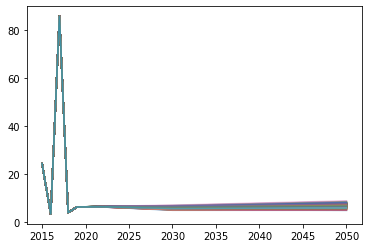

In [185]:
keep_masters = list(df_am[(df_am["strategy_id"] == 1) & (df_am["time_series_id"] == 0)]["master_id"].unique())

df_tmp = df_out_an[["master_id", "year", "fo-aov-incendios-mtco2e"]].copy().sort_values(by = ["master_id", "year"]).reset_index(drop = True)
dict_avgs = {}
for m_id in keep_masters:
    dict_avgs.update({})
    df_t = df_tmp[df_tmp["master_id"] == m_id]
    
    x = np.array(df_t["year"])
    y = np.array(df_t["fo-aov-incendios-mtco2e"])
    
    plt.plot(x, y, alpha = 0.5)

plt.show()
                
    

In [99]:
field_fire = "fo-aov-incendios-mtco2e"

keep_masters = set(df_am[(df_am["strategy_id"] == 1) & (df_am["time_series_id"] == 0)]["master_id"].unique())
check_masters = set(df_out_an[(df_out_an[field_fire] > 24) & (df_out_an["year"] > 2018)]["master_id"]) & keep_masters
other_masters = keep_masters - check_masters

In [116]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
check_params = set(df_params[df_params["sector"] == "Analytica_forestry"]["parameter"])
check_params = check_params - set([x for x in list(check_params) if (x[0:4] == "traj")])
check_params = list(check_params | set(["incertidumbre_megaincendio"]))
check_params.sort()
check_params



['incertidumbre_demanda_productos_forestales',
 'incertidumbre_incendio_bn',
 'incertidumbre_incendio_plantaciones',
 'incertidumbre_megaincendio',
 'incertidumbre_perdida_de_bosque_nativo',
 'incertidumbre_rendimiento_bn',
 'incertidumbre_rendimiento_plantacion',
 'incertidumbre_var_demanda_legna',
 'medida_forestacion_bn',
 'medida_forestacion_plantaciones',
 'medida_incendio_bosque_nativo',
 'medida_incendio_plantaciones_forestales',
 'medida_plan_de_manejo',
 'medida_sustitucion_degradacion']

In [129]:
field_im = "incertidumbre_megaincendio"
df_weird = df_ed[(df_ed["year"].isin([2050])) & (df_ed["master_id"].isin(check_masters))][check_params]#.to_csv("/Users/jsyme/Desktop/exp_weird.csv", index = None, encoding = "UTF-8")
df_ok = df_ed[(df_ed["year"].isin([2050])) & (df_ed["master_id"].isin(other_masters))][check_params]#.to_csv("/Users/jsyme/Desktop/exp_ok.csv", index = None, encoding = "UTF-8")





In [190]:
df_out_pmr = pd.read_csv(sr.fp_csv_output_multi_sector_pmr)

In [191]:
len(df_out_pmr["master_id"].unique())

402

In [163]:
df_out_pmr = pd.read_csv(sr.fp_csv_output_multi_sector_pmr)

In [165]:
len(df_out_pmr["master_id"].unique())

389

In [178]:
#
#   BUILD DAVE'S ONE TIME MODEL
#

import pyDOE as pyd
all_fut = set(df_am[df_am["master_id"].isin(set(df_out_an["master_id"]))]["future_id"])
matrix_lhs = pyd.lhs(4, samples = (len(all_fut) - 1))

pd_lhs = pd.DataFrame(matrix_lhs, columns = ["change_size_megafire", "change_prob_megafire", "fire_lever_2050_normalfire", "fire_lever_2050_megafire"])
pd_lhs["future_id"] = range(1, len(pd_lhs) + 1)
pd_lhs = pd_lhs[["future_id"] + [x for x in pd_lhs.columns if "future_id" not in x]]
pd_lhs.to_csv(os.path.join(sr.dir_out, "lhs_table_megafire_example.csv"), index = None, encoding = "UTF-8")


In [177]:
pd_lhs

,future_id,change_size_megafire,change_prob_megafire,fire_lever_2050_normalfire,fire_lever_2050_megafire
0,1,0.297464,0.469289,0.243436,0.650568
1,2,0.270610,0.382706,0.717327,0.586645
2,3,0.114954,0.048030,0.551166,0.247916
3,4,0.214116,0.348513,0.998466,0.775159
4,5,0.945846,0.478066,0.891483,0.714113
...,...,...,...,...,...
195,196,0.691013,0.994932,0.535694,0.084327
196,197,0.728722,0.570263,0.465200,0.965157
197,198,0.704711,0.551119,0.732973,0.870304
198,199,0.668536,0.028798,0.738453,0.174602


In [195]:
[x for x in df_out_an.columns if "fo-" in x]

['fo-aov-4a_forestal-mtco2e',
 'fo-aov-4b_cultivo-mtco2e',
 'fo-aov-4c_pastizal-mtco2e',
 'fo-aov-4d_humedal-mtco2e',
 'fo-aov-4e_asentamientos-mtco2e',
 'fo-aov-4f_otras_tierras-mtco2e',
 'fo-aov-incendios-mtco2e',
 'fo-emissions_total-mtco2e']

In [244]:
df_am = pd.read_csv(sr.fp_csv_attribute_master)

df_fe = pd.read_csv(os.path.join(sr.dir_out, "Forestry Emissions EXPORT_utf8.csv"))
df_fe = df_fe.rename(columns = {
    "Year": "year", 
    "Future Id": "future_id", 
    "Baseline Assumptions": "time_series_id",
    "Change in probability of mega fire FUTURES": "change_probability_mega_incendios",
    "Change in size of mega fire FUTURES": "change_size_mega_incendios",
    "Fire lever on size of mega fire FUTURES": "fire_lever_on_mega_incendios",
    "Mega Fires": "fo-mega_incendios_rand-mtco2e"
    }
)
#replace
df_fe["time_series_id"] = df_fe["time_series_id"].replace({"Supuestos NDC": 1, "Supuestos Actuales": 0}) 
df_fe["future_id"] = df_fe["future_id"].replace({"Supuestos de referencia": 0}).astype(int)
fields_ext = [x for x in df_fe.columns if (x.lower() == x)]
df_fe = df_fe[df_fe["year"] == 2050]
fields_scen = [x for x in fields_ext if x[-3:] == "_id"]
fields_dat = [x for x in fields_ext if (x not in fields_scen) and (x != "year")]
df_fe = df_fe[fields_scen + fields_dat]



df_prim = pd.read_csv(sr.fp_csv_prim_input_data)

fields_merge = set(df_prim.columns) & set(df_fe.columns)
intersect_check_q = (len(fields_merge) == len(df_fe.columns))

if not set(fields_dat).issubset(set(df_prim.columns)):
    fields_pc = list(df_prim.columns)
    
    df_prim = pd.merge(df_prim, df_am[["master_id", "future_id"]], how = "left", on = ["master_id"])
    df_prim = pd.merge(df_prim, df_fe, how = "left", on = ["time_series_id", "future_id"])
    
    #update total
    df_prim["fo-emissions_total-mtco2e"] = np.array(df_prim["fo-emissions_total-mtco2e"]) + np.array(df_prim["fo-mega_incendios_rand-mtco2e"])
    df_prim = df_prim[fields_pc + fields_dat]
    
    df_prim.to_csv(sr.fp_csv_prim_input_data.replace(".csv", "_with_rand_mega_incendios.csv"), index = None, encoding = "UTF-8")


In [251]:
df_out_an_for = pd.read_csv(sr.fp_csv_output_multi_sector_analytica.replace(".csv", "_forestonly.csv"))
df_out_an = pd.read_csv(sr.fp_csv_output_multi_sector_analytica)
fields_overwrite = [x for x in df_out_an_for if "fo-" in x]
fields_ord_an = list(df_out_an.columns)
df_out_an = df_out_an[[x for x in fields_ord_an if x not in fields_overwrite]]
fields_merge = list(set(df_out_an.columns) & set(df_out_an_for.columns))
df_out_an = pd.merge(df_out_an, df_out_an_for, how = "inner", on = fields_merge).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_out_an = df_out_an[fields_ord_an]



In [256]:
df_out_an[df_out_an["year"] == 2019][[x for x in df_out_an.columns if "fo-" in x]]

,fo-aov-4a_forestal-mtco2e,fo-aov-4b_cultivo-mtco2e,fo-aov-4c_pastizal-mtco2e,fo-aov-4d_humedal-mtco2e,fo-aov-4e_asentamientos-mtco2e,fo-aov-4f_otras_tierras-mtco2e,fo-aov-incendios-mtco2e,fo-emissions_total-mtco2e
4,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
40,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
76,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
112,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
148,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
...,...,...,...,...,...,...,...,...
14296,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
14332,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
14368,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946
14404,-68.004049,1.547679,1.828997,0.020584,0.355995,0.552294,6.232553,-57.465946


In [20]:
df_fut = pd.read_csv(sr.fp_csv_attribute_future)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)
df_mtr = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run)
df_mtrg = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)


set_fut_elec = set(df_fut[df_fut["sector"] == "electricity_generation"]["future_id"])
set_mas_elec = set(df_mas[df_mas["future_id"].isin(set_fut_elec)]["master_id"])
set_mas_elec = set_mas_elec & set(df_mtrg["master_id"])
df_mtrg_out = df_mtrg[df_mtrg["master_id"].isin(set_mas_elec)]

df_mtrg_out.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams, encoding = "UTF-8", index = None)
3



In [19]:
df_mtrg_out

,master_id
34,256
35,734
36,257
37,735
334,406
335,884
336,407
337,885
338,408
339,886
